# Econ 621 Project - Aziz Ben Jemia
## Analysis of Household Decision-Making Influence: A Logistic Regression Approach
### Citation
Oluoch-Aridi, Jackline; Adam, Mary; Wafula, Francis; Kokwaro, Gilbert (2020), Understanding what women want: eliciting preference for delivery health facility in a rural sub-County in Kenya, a discrete choice experiment, Dryad, Dataset, https://doi.org/10.5061/dryad.1vhhmgqrk

### Description

The dependent variable in this study is **"hohnoinfluence"**, which indicates whether the respondent has influence over household decision-making. It is coded as:

- **1**: The respondent has influence over household decisions.
- **0**: The respondent has no influence.

The independent variables chosen for the analysis are:

- **"motherhoodinsurance"**: Indicates whether the respondent has health insurance.
  - **0**: No insurance.
  - **1**: Has insurance.
- **"schooling"**: Represents the respondent's level of education.
  - **1**: Primary education.
  - **2**: Secondary education.
  - **3**: Tertiary education.
- **"mainearner"**: Identifies the primary earner in the household.
  - **0**: Partner is the main earner.
  - **1**: Respondent is the main earner.
- **"motherhoodpregnancyexperiencetim"**: Captures the total number of times the respondent has been pregnant.
- **"married"**: Indicates the respondent's marital status.
  - **0**: Unmarried.
  - **1**: Married.

These variables were selected because they are hypothesized to have a significant correlation with a woman's influence in household decision-making.

### Purpose of the Study

The purpose of this study is to explore the factors that shape women's influence on family decisions within the sub-County. For instance, education levels or health insurance coverage may empower women to have more say in household matters. However, there may be other unexpected factors that this analysis seeks to uncover, providing deeper insights into the dynamics of women's roles in family decision-making.

**1. Import Libraries:**


In [19]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import optimize

# Display settings
%matplotlib inline
sns.set(style="whitegrid")

**2. Load and Explore the Dataset:**

In [4]:
# Load the dataset
file_path = 'finalproject.xlsx'  # Replace with actual file path
data = pd.read_excel(file_path, sheet_name='Naivasha database')

# Display basic information
print("Dataset Overview:")
print(data.info())

# Preview the first few rows
data.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22368 entries, 0 to 22367
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   baseline_uuid                     22368 non-null  object 
 1   dce_uuid                          22368 non-null  object 
 2   ncs                               22368 non-null  int64  
 3   respondent_id                     22368 non-null  int64  
 4   choice_set                        22368 non-null  int64  
 5   alt                               22368 non-null  int64  
 6   block                             22368 non-null  int64  
 7   choice                            22368 non-null  int64  
 8   goodqualityclinicalservices       22368 non-null  int64  
 9   badqualityclinicalservices        22368 non-null  int64  
 10  distancetofacilityshort           22368 non-null  int64  
 11  distancetofacilitylong            22368 non-null 

,baseline_uuid,dce_uuid,ncs,respondent_id,choice_set,alt,block,choice,goodqualityclinicalservices,badqualityclinicalservices,...,motherhoodinsurance,motherhoodpregnantnow,motherhoodpregnancyexperiencetim,uuid,hohcareer,birthplace_type1,birthplace_facility_level,_merge,baseline_uuiddce_uuidncsresponde,Unnamed: 38
0,uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865,1,0,1,3,1,0,0,0,...,1,1,3,12c509e6-2d7f-4b39-a0a6-157b11e77155,NaN,1.0,0,matched (3),uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865
1,uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865,1,0,1,1,1,0,0,1,...,1,1,3,12c509e6-2d7f-4b39-a0a6-157b11e77155,NaN,1.0,0,matched (3),uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865
2,uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865,1,0,1,2,1,1,1,0,...,1,1,3,12c509e6-2d7f-4b39-a0a6-157b11e77155,NaN,1.0,0,matched (3),uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865
3,uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865,2,0,2,1,1,0,0,1,...,1,1,3,12c509e6-2d7f-4b39-a0a6-157b11e77155,NaN,1.0,0,matched (3),uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865
4,uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865,2,0,2,3,1,1,0,0,...,1,1,3,12c509e6-2d7f-4b39-a0a6-157b11e77155,NaN,1.0,0,matched (3),uuid:12c509e6-2d7f-4b39-a0a6-157b11e77155,uuid:524ed741-ac93-4b4f-83ab-4c96b77d3865


**3. Data Cleaning and Preprocessing:**

In [5]:
# Selecting key variables for analysis
relevant_columns = [
    'hohnoinfluence', 'motherhoodinsurance', 'schooling', 'mainearner',
    'motherhoodpregnancyexperiencetim', 'married'
]

cleaned_data = data[relevant_columns].dropna()

# Convert appropriate columns to integer or categorical types
cleaned_data = cleaned_data.astype({
    'hohnoinfluence': 'int',
    'motherhoodinsurance': 'int',
    'mainearner': 'int',
    'motherhoodpregnancyexperiencetim': 'int',
    'married': 'int'
})

# Summary of cleaned data
cleaned_data.describe(include='all')

,hohnoinfluence,motherhoodinsurance,schooling,mainearner,motherhoodpregnancyexperiencetim,married
count,18240.000000,18240.000000,18240.000000,18240.000000,18240.000000,18240.000000
mean,0.952632,0.552632,1.818421,0.057895,2.268421,0.957895
std,0.212431,0.497236,0.895144,0.233551,1.401749,0.200835
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,15.000000,1.000000


**4. Exploratory Data Analysis:**

Influence by Marital Status

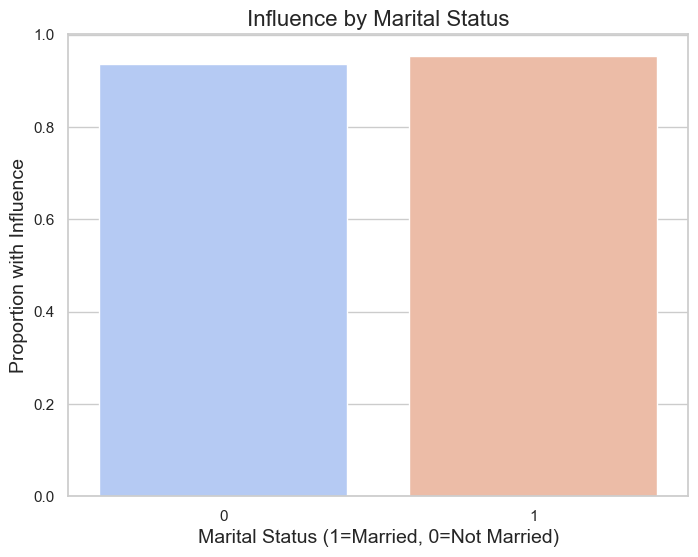

In [6]:
import warnings
warnings.filterwarnings("ignore")
# Influence by Marital Status
plt.figure(figsize=(8, 6))
sns.barplot(x='married', y='hohnoinfluence', data=cleaned_data, ci=None, palette='coolwarm')
plt.title('Influence by Marital Status', fontsize=16)
plt.xlabel('Marital Status (1=Married, 0=Not Married)', fontsize=14)
plt.ylabel('Proportion with Influence', fontsize=14)
plt.show()

Influence by Number of Pregnancies

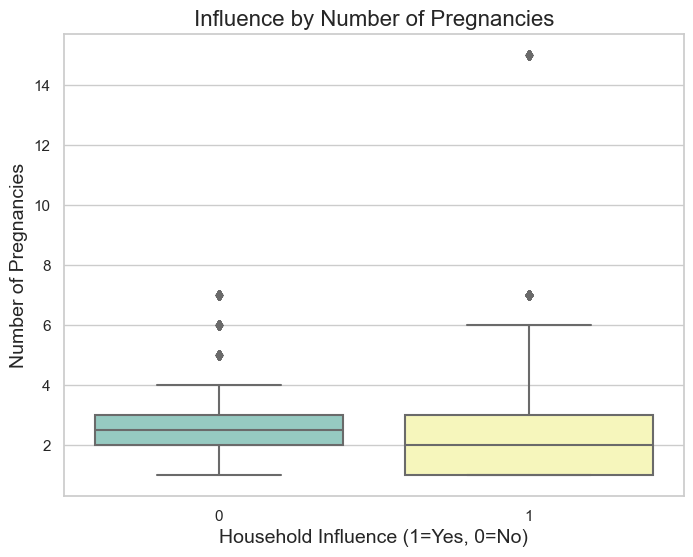

In [7]:
# Influence by Number of Pregnancies
plt.figure(figsize=(8, 6))
sns.boxplot(x='hohnoinfluence', y='motherhoodpregnancyexperiencetim', data=cleaned_data, palette='Set3')
plt.title('Influence by Number of Pregnancies', fontsize=16)
plt.xlabel('Household Influence (1=Yes, 0=No)', fontsize=14)
plt.ylabel('Number of Pregnancies', fontsize=14)
plt.show()

Influence by Being the Main Earner

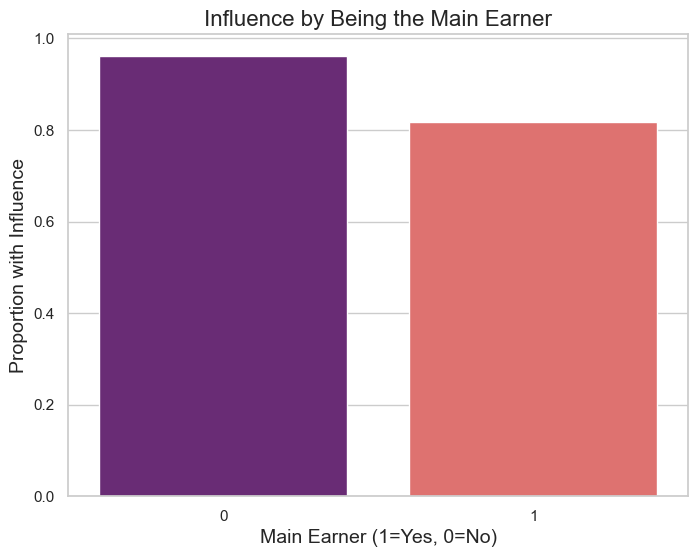

In [8]:
# Influence by Being the Main Earner
plt.figure(figsize=(8, 6))
sns.barplot(x='mainearner', y='hohnoinfluence', data=cleaned_data, ci=None, palette='magma')
plt.title('Influence by Being the Main Earner', fontsize=16)
plt.xlabel('Main Earner (1=Yes, 0=No)', fontsize=14)
plt.ylabel('Proportion with Influence', fontsize=14)
plt.show()

Combined Influence by Education Level and Marital Status

<Figure size 1000x800 with 0 Axes>

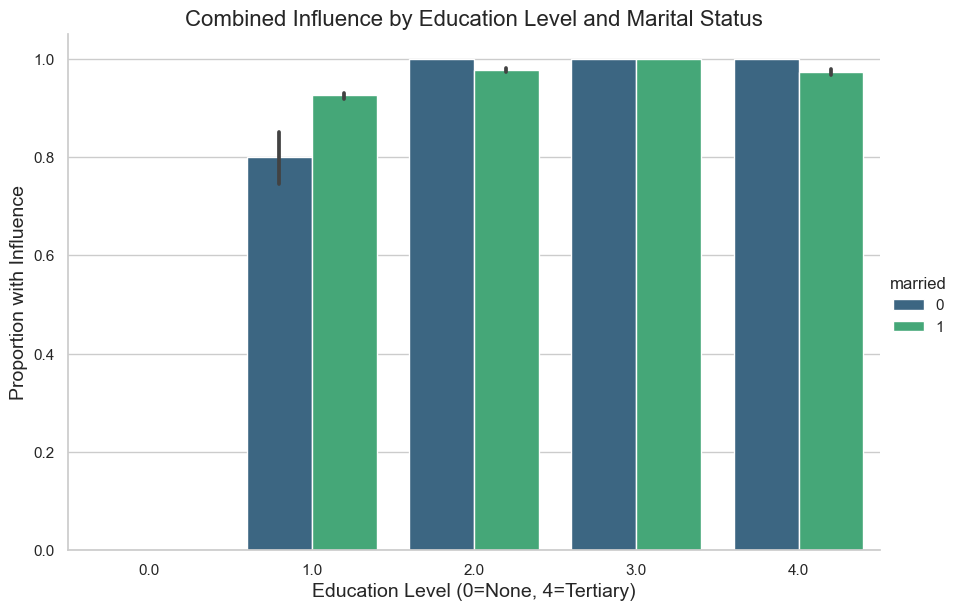

In [9]:
# Combined Education and Marital Status Influence
plt.figure(figsize=(10, 8))
sns.catplot(
    x='schooling', hue='married', y='hohnoinfluence', 
    data=cleaned_data, kind='bar', height=6, aspect=1.5, palette='viridis'
)
plt.title('Combined Influence by Education Level and Marital Status', fontsize=16)
plt.xlabel('Education Level (0=None, 4=Tertiary)', fontsize=14)
plt.ylabel('Proportion with Influence', fontsize=14)
plt.show()

Variables Relationships

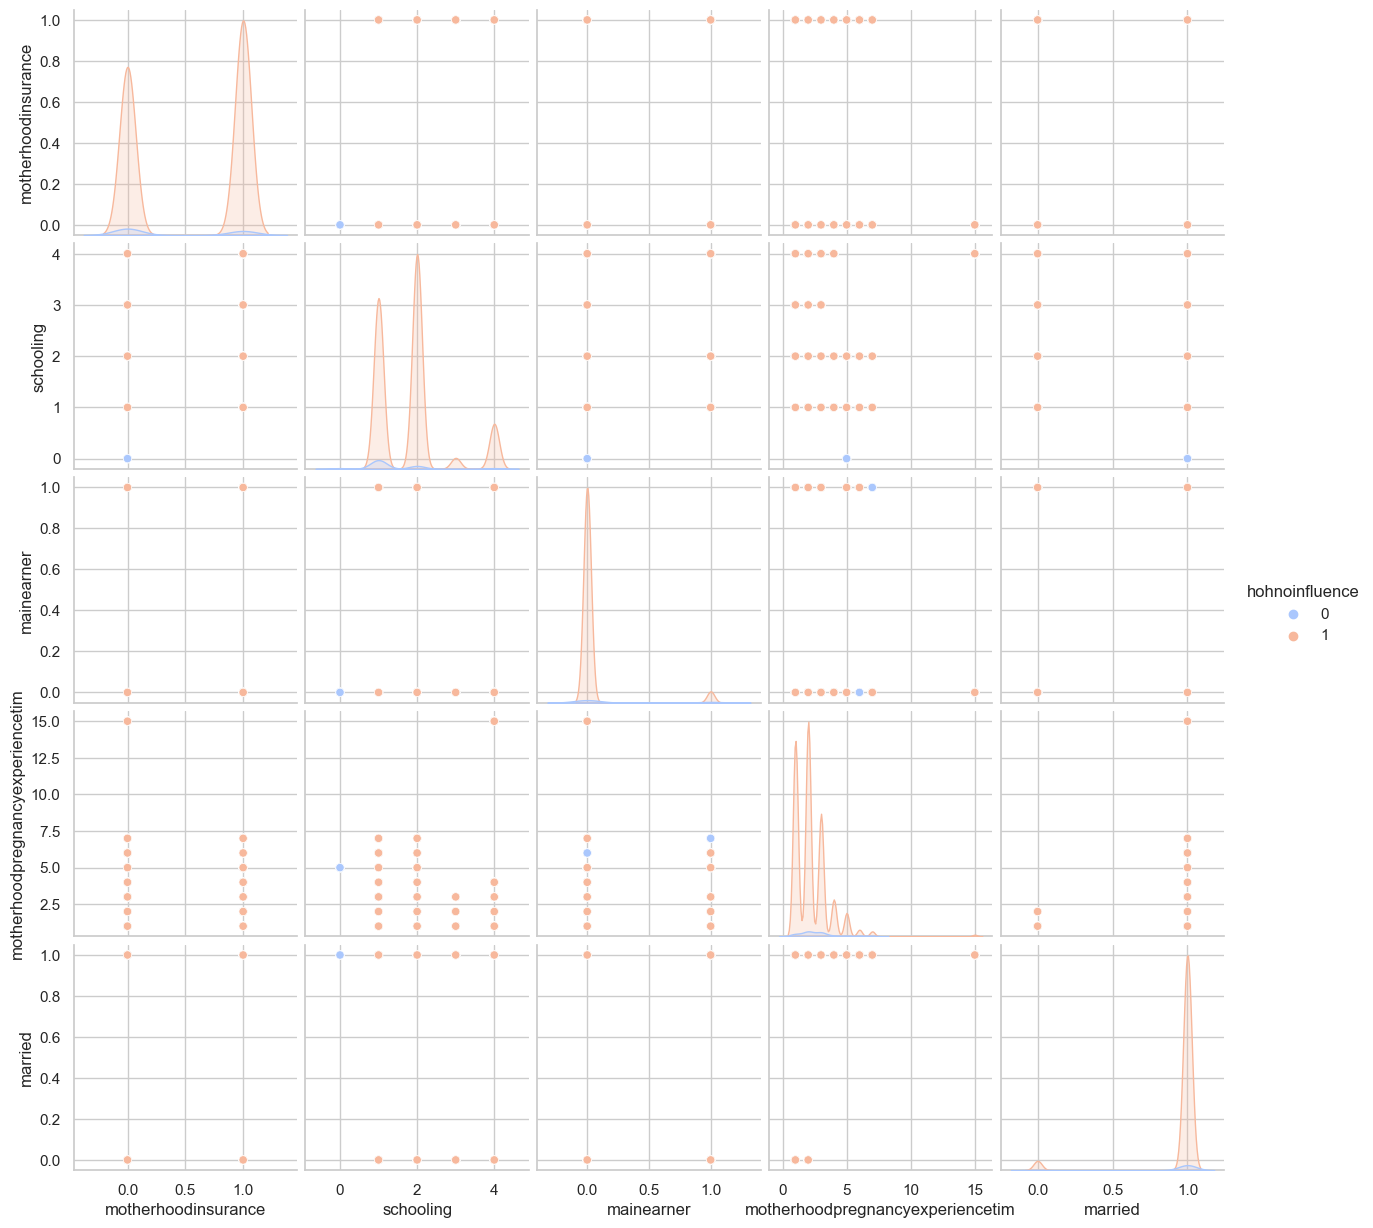

In [10]:
sns.pairplot(cleaned_data, hue='hohnoinfluence', palette='coolwarm')
plt.show()

### Logistic Regression Analysis

**select data for logit regression:**

In [15]:
cleaned_data['intercept']=1
df2 = cleaned_data[['intercept', 'motherhoodinsurance', 
          'schooling', 'mainearner', 'motherhoodpregnancyexperiencetim', 'married', 'hohnoinfluence']]

df2.reset_index(drop=True)

,intercept,motherhoodinsurance,schooling,mainearner,motherhoodpregnancyexperiencetim,married,hohnoinfluence
0,1,0,1.0,0,3,1,1
1,1,0,1.0,0,3,1,1
2,1,0,1.0,0,3,1,1
3,1,0,1.0,0,3,1,1
4,1,0,1.0,0,3,1,1
...,...,...,...,...,...,...,...
18235,1,1,1.0,0,2,1,1
18236,1,1,1.0,0,2,1,1
18237,1,1,1.0,0,2,1,1
18238,1,1,1.0,0,2,1,1


**Prep data to b fit for regression analysis**

In [16]:
# Standardize pregnancy frequency
df2['motherhoodpregnancyexperiencetim']=(df2['motherhoodpregnancyexperiencetim']-df2['motherhoodpregnancyexperiencetim'].mean())/df2['motherhoodpregnancyexperiencetim'].std()
df2_logit = np.array(df2)


**Sigmoid and Log-Likelihood functions followed by optimization**

In [25]:
def sigmoid_mn(data, beta):
   
    Xb = np.dot(data, beta)
    
    
    eXb = np.exp(Xb)
    eXb = eXb /eXb.sum(1)[:, None]
    return eXb

In [26]:
def LL_mn(params, *args):
    
    y, X, n_params, n_classes = args[0], args[1], args[2], args[3]
    
   
    beta = params
    
    
    beta = np.array(beta).reshape(n_params, -1, order='F')

    
    beta[:,0] = [0]*n_params
    
     
    d = pd.get_dummies(y).to_numpy()
    
    probs = sigmoid_mn(X, beta)
    logged = np.log(probs)
    ll = d * logged
    
    return -np.sum(ll)

**Including All variables of interest:**

In [32]:
n_params = 6
n_classes = 2
start_values = np.random.rand(n_params*n_classes)


res = optimize.minimize(LL_mn, x0 =start_values, args =(df2_logit[:, 6], df2_logit[:, :6], n_params, n_classes))
res['x']

array([ 0.99885169,  0.31156692,  0.6477945 ,  0.1765332 ,  0.19135824,
        0.3754489 ,  1.44610806,  0.56991664,  0.79239626, -1.59214938,
       -0.26571313,  0.30502391])

**using sm.Logit**

In [33]:
log_reg = sm.Logit(df2_logit[:, 6], df2_logit[:, :6]).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.170633
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                18240
Model:                          Logit   Df Residuals:                    18234
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.1052
Time:                        17:27:58   Log-Likelihood:                -3112.3
converged:                       True   LL-Null:                       -3478.2
Covariance Type:            nonrobust   LLR p-value:                6.560e-156
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4461      0.183      7.903      0.000       1.087       1.805
x1             0.5699      0.074      7.728      0.000       0.425       0.714
x2             0.7924      0.060     13.279      0.000       0.675       0.909
x3            -1.5921      0.094    -16.939      0.000      -1.776      -1.408
x4            -0.2657      0.030     -8.844      0.000      -0.325      -0.207
x5             0.3050      0.167      1.823      0.068      -0.023       0.633
==============================================================================
"""

In [34]:
log_reg.get_margeff().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0242      0.003      7.611      0.000       0.018       0.030
x2             0.0336      0.003     12.613      0.000       0.028       0.039
x3            -0.0676      0.004    -16.183      0.000      -0.076      -0.059
x4            -0.0113      0.001     -8.698      0.000      -0.014      -0.009
x5             0.0129      0.007      1.822      0.069      -0.001       0.027
==============================================================================
"""

* x1 is mother's health insurance: 0 if no insurance, 1 if insurance exists
* x2 is the mother's level of education: we have 3 possible values (1,2, and 3). 1 if primary education, 2 if secondary education, and 3 if tertiary education
* x3 is main earner: 1 if woman is the main earner in the household, 0 if her partner is the main earner
* x4 is frequency of pregnancy: total number of times the respondent was pregnant in the past
* x5 is the respondent's marital status: 0 if respondent is unmarried, 1 if married

We notice that all of our coefficients are highly significant. Further, all of our 95% confidence intervals except B5(coefficient of "Married) do not include 0, thus, we can reject the null hypothesis that these coefficients are equal to 0. We can't however reject the null hypothesis beta5=0 even though the latter coefficient is significant at 10% level. We, also, see that the coefficients of sm.logit() are similar to our optimization.

* x1: having a health insurance is associated with a 2.41% increase in the probability of having influence
* x2: an increase of 1 level in education is associated with a 3.36% increase in the probability of having influence
* x3: being the main earner is associated with a 6.75% decrease in the the probability of having influence
* x4: an increase of 1 unit in the number of pregnancy in the past is associated with a 1.12% decrease in the probability of having influence

**Excluding x5, the respondent's marital status:**

In [36]:
n_params = 5
n_classes = 2
start_values = np.random.rand(n_params*n_classes)


res = optimize.minimize(LL_mn, x0 =start_values, args =(df2_logit[:, 5], df2_logit[:, :5], n_params, n_classes))
res['x']

array([ 0.43814774,  0.57383005,  0.51275925,  0.20732519,  0.13333311,
        4.27327499,  0.78545455,  0.1880604 , -0.79544477,  3.24785372])

In [37]:
log_reg = sm.Logit(df2_logit[:, 5], df2_logit[:, :5]).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.136616
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                18240
Model:                          Logit   Df Residuals:                    18235
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.2174
Time:                        17:42:42   Log-Likelihood:                -2491.9
converged:                       True   LL-Null:                       -3184.3
Covariance Type:            nonrobust   LLR p-value:                1.340e-298
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2733      0.149     28.675      0.000       3.981       4.565
x1             0.7855      0.080      9.861      0.000       0.629       0.942
x2             0.1881      0.050      3.794      0.000       0.091       0.285
x3            -0.7954      0.127     -6.281      0.000      -1.044      -0.547
x4             3.2479      0.146     22.232      0.000       2.962       3.534
==============================================================================
"""

In [38]:
log_reg.get_margeff().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0288      0.003      9.715      0.000       0.023       0.035
x2             0.0069      0.002      3.783      0.000       0.003       0.010
x3            -0.0292      0.005     -6.278      0.000      -0.038      -0.020
x4             0.1192      0.006     19.539      0.000       0.107       0.131
==============================================================================
"""

**Model 2 Results:** 

This model appear to be stronger because all variables are significant, higher marginal effects for significant variables, larger z-scores indicate more rboust results.

### Summary:

This project explores the factors influencing women’s household decision-making power using logistic regression models. Key findings include:

* Motherhood Insurance: Access to health insurance significantly enhances women’s household influence, underscoring its critical role in empowerment strategies.

* Education: Higher education levels have a strong positive impact, emphasizing the transformative role of education in improving decision-making power and fostering gender equity.

* Main Earner: Being the primary earner is associated with reduced household influence, suggesting that traditional household dynamics may persist, even when women contribute significantly to the household economy.

* Pregnancy: More pregnancies are associated with a slight reduction in influence, likely due to increased caregiving responsibilities that may shift focus away from decision-making roles.

* Marital Status Exclusion: The exclusion of marital status (𝑥5) from the second model yielded better results, suggesting that marital status may not be a strong predictor of household influence compared to other factors.

